In [1]:
from pathlib import Path
import os

#BEX.. kommer att utgå att i nedan ifylld mapp finns mappar som heter train 
# och sedan letar den efter mappar som heter något med yes/no

current_folder = Path(os.getcwd())  #Githfolder -> StudieGrupp3_MLProjekt \ notebooks \ eda
path = current_folder.parent.parent / "data/processed"
path


WindowsPath('d:/Projektarbete/StudieGrupp3_MLProjekt/data/processed')

In [2]:
from pipeline_aug_geo import BEX_aug_geometric

dict_geo_no = {}
dict_geo_yes = {}

aug = BEX_aug_geometric(path)
dict_geo_no, dict_geo_yes = aug.run_program()

In [3]:
from pipeline_aug_pix import BEX_aug_pixel
dict_pix_no = {}
dict_pix_yes = {}
aug2 = BEX_aug_pixel(path)
dict_pix_no, dict_pix_yes = aug2.run_program()

C:\Users\wibst\AppData\Roaming\Python\Python38\site-packages\albumentations\augmentations\transforms.py:1952: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


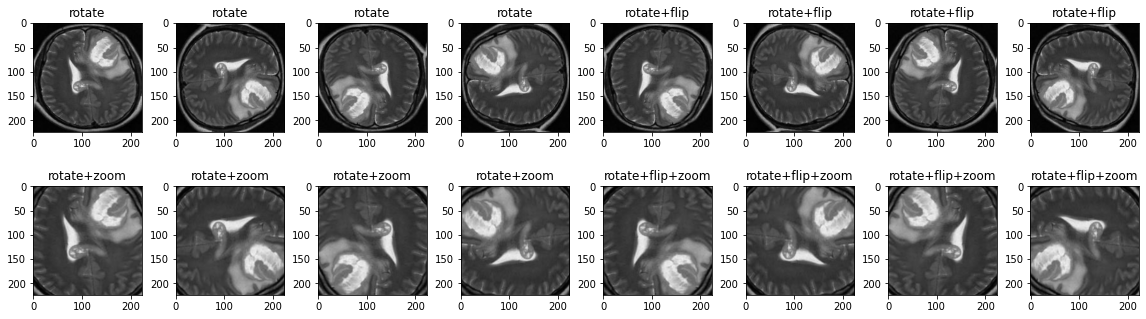

In [4]:
import numpy as np
import matplotlib.pyplot as plt

list_of_names = []
for k in dict_geo_yes:
    list_of_names.append(k)

list_of_aug = []

for i in range(16):
    if i <= 3:
        list_of_aug.append("rotate")
    elif i > 3 and i <= 7:
        list_of_aug.append("rotate+flip")
    elif i > 7 and i <= 11:
        list_of_aug.append("rotate+zoom")
    else:
        list_of_aug.append("rotate+flip+zoom")

plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=0.5)
for i in range(1):
    for j in range(16):
        plt.subplot(2,8,j+1).set_title(list_of_aug[j])
        plt.imshow(dict_geo_yes[list_of_names[i]][j])
plt.show()

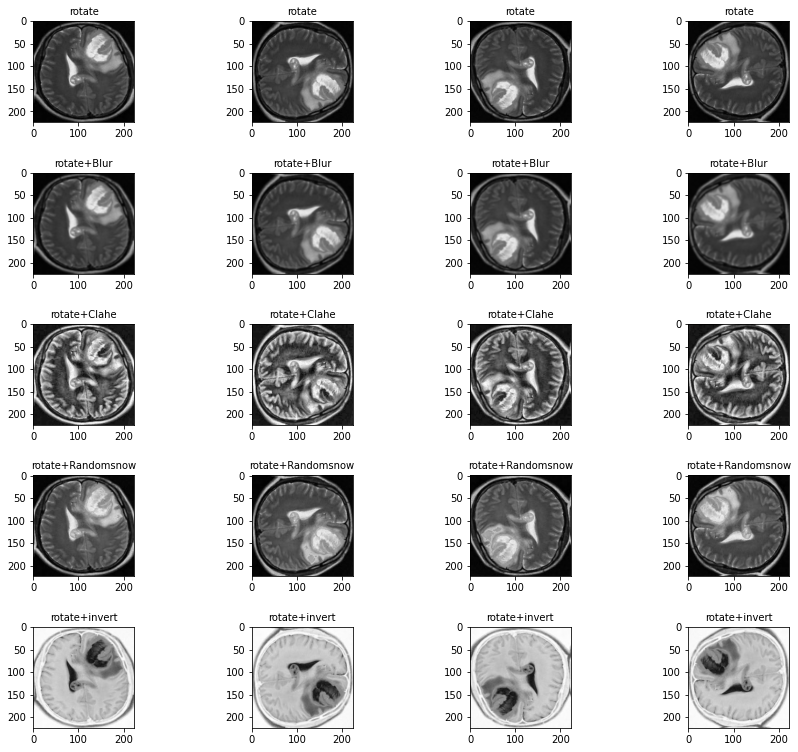

In [5]:
import numpy as np
import matplotlib.pyplot as plt

list_of_names = []
for k in dict_pix_yes:
    list_of_names.append(k)

list_of_aug = []

for i in range(20):
    if i <= 3:
        list_of_aug.append("rotate")
    elif i > 3 and i <= 7:
        list_of_aug.append("rotate+Blur")
    elif i > 7 and i <= 11:
        list_of_aug.append("rotate+Clahe")
    elif i > 11 and i <= 15:
        list_of_aug.append("rotate+Randomsnow")
    else:
        list_of_aug.append("rotate+invert")

plt.figure(figsize=(15,13))
plt.subplots_adjust(hspace=0.5)
for i in range(1):
    for j in range(20):
        plt.subplot(5,4,j+1)#.set_title(list_of_aug[j], font_size=8)
        plt.title(list_of_aug[j], fontsize=10)
        plt.imshow(dict_pix_yes[list_of_names[i]][j])
plt.show()